In [1]:
import h5py
import numpy as np
from tqdm.notebook import tqdm
import os
import glob
import matplotlib.pyplot as plt
import time

from train_Informer_d import *

from utils import *
from models import *

import warnings
warnings.filterwarnings('ignore')

assert torch.cuda.is_available()
device = 'cuda'

In [2]:
train_f = sorted(glob.glob('train/*.hdf'))
# train_f.remove('train\\20190425_20190510.hdf')
test_f = sorted(glob.glob('test/*.hdf'))
# test_f.remove('../stock_price/test\IC2003_20191018.hdf') # batch为256时，第71个batch大小为2， 不足以用于预测

In [3]:
len(test_f)

174

In [4]:
# train_f = [train_f[0],train_f[3]，train_f[-1]]
train_f

['train\\20190401_20190412.hdf',
 'train\\20190412_20190424.hdf',
 'train\\20190425_20190510.hdf',
 'train\\20190510_20190522.hdf',
 'train\\20190523_20190604.hdf',
 'train\\20190604_20190617.hdf',
 'train\\20190617_20190628.hdf',
 'train\\20190628_20190710.hdf',
 'train\\20190710_20190723.hdf',
 'train\\20190723_20190731.hdf']

In [5]:
# Hyperparams
enc_in = 15
dec_in = 2
c_out = 1 
seq_len = 20
out_len = 1
d_model = 64
d_ff = 32
n_heads = 4
label_len = 10
e_layers = 3
d_layers = 2
scaler = False
opt_s = False

decay = 100
dropout = 0.3
batch_size = 256
val_batch = 512
lr = 0.0005

In [6]:
Informer = Train_Informer(enc_in, dec_in, c_out, seq_len, out_len, d_model, d_ff, n_heads, 
                                e_layers, d_layers, label_len,
                                dropout, batch_size, val_batch, lr,
                              device, train_f, test_f,scaler, decay, opt_s)

In [7]:
Informer._build_model()

Informer(
  (enc_embedding): DataEmbedding(
    (position_embedding): PositionalEmbedding()
    (fc): Linear(in_features=15, out_features=64, bias=True)
  )
  (dec_embedding): DataEmbedding(
    (position_embedding): PositionalEmbedding()
    (fc): Linear(in_features=2, out_features=64, bias=True)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0): EncoderLayer(
        (attention): AttentionLayer(
          (inner_attention): FullAttention(
            (dropout): Dropout(p=0.3, inplace=False)
          )
          (query_projection): Linear(in_features=64, out_features=64, bias=True)
          (key_projection): Linear(in_features=64, out_features=64, bias=True)
          (value_projection): Linear(in_features=64, out_features=64, bias=True)
          (out_projection): Linear(in_features=64, out_features=64, bias=True)
        )
        (conv1): Conv1d(64, 32, kernel_size=(1,), stride=(1,))
        (conv2): Conv1d(32, 64, kernel_size=(1,), stride=(1,))
        (norm1): 

In [8]:
Informer._selct_optim('adam')
Informer._selct_scheduler(opt='noam',patience=5, factor=0.5,step=5000)
# Informer._selct_scheduler(opt='cyclic',base_lr=0.001, max_lr=0.005)

In [9]:
print("Total number of paramerters in networks is {}  ".format(sum(x.numel() for x in Informer.model.parameters())))

Total number of paramerters in networks is 140513  


In [10]:
Informer.val_every = True

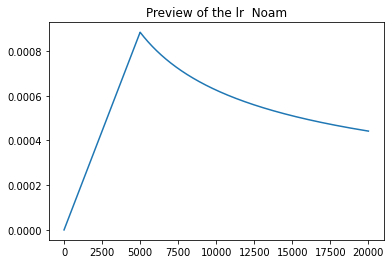

In [11]:
Informer.preview_noam()

In [ ]:
Informer.train(epochs=10, train_all=True, f='../stock_price/train/20190723_20190731.hdf',
              save='train',patience=40,val_size=0.2,test_round=1)

  0%|          | 0/10 [00:00<?, ?it/s]

After training train\20190401_20190412  Train_loss:0.987484 R2:0.179223 | Val_Loss:0.832603 |R2:0.311419 |Rate:0.669 |lr:0.000281
After training train\20190412_20190424  Train_loss:0.894261 R2:0.323205 | Val_Loss:0.875477 |R2:0.344059 |Rate:0.677 |lr:0.000561
After training train\20190425_20190510  Train_loss:1.043503 R2:0.350040 | Val_Loss:1.079574 |R2:0.335339 |Rate:0.668 |lr:0.000840
After training train\20190510_20190522  Train_loss:0.820750 R2:0.342639 | Val_Loss:0.824889 |R2:0.341744 |Rate:0.674 |lr:0.000790
After training train\20190523_20190604  Train_loss:0.653706 R2:0.342020 | Val_Loss:0.643084 |R2:0.357031 |Rate:0.685 |lr:0.000714
After training train\20190604_20190617  Train_loss:0.419291 R2:0.358658 | Val_Loss:0.458475 |R2:0.313073 |Rate:0.656 |lr:0.000656
After training train\20190617_20190628  Train_loss:0.435564 R2:0.339468 | Val_Loss:0.445012 |R2:0.332547 |Rate:0.668 |lr:0.000611
After training train\20190628_20190710  Train_loss:0.325422 R2:0.367626 | Val_Loss:0.34703

In [ ]:
Informer.train(epochs=20, train_all=True, f='../../stock_price/train/20190723_20190731.hdf',
             val_all=True, testfile=None, save='train',patience=40)

  0%|          | 0/20 [00:00<?, ?it/s]

After training train\20190401_20190412  Val_Loss:0.432893 |R2:0.045493 |Rate:0.606 |lr:0.000246
After training train\20190523_20190604  Val_Loss:0.329468 |R2:0.276902 |Rate:0.665 |lr:0.000462
After training train\20190617_20190628  Val_Loss:0.374537 |R2:0.170675 |Rate:0.644 |lr:0.000678
After training train\20190710_20190723  Val_Loss:0.305510 |R2:0.335919 |Rate:0.673 |lr:0.000897
Save here
Epoch:  1 |Train_Loss:0.717126 |R2:0.139060|Val_Loss:0.305510 |R2:0.335919 |Rate:0.673 |lr:0.000897
Validation R2 increased (-inf --> 0.335919).  Saving model ...
After training train\20190401_20190412  Val_Loss:0.314590 |R2:0.312446 |Rate:0.670 |lr:0.000919
After training train\20190523_20190604  Val_Loss:0.313054 |R2:0.316031 |Rate:0.667 |lr:0.000842
After training train\20190617_20190628  Val_Loss:0.335206 |R2:0.263153 |Rate:0.653 |lr:0.000783
After training train\20190710_20190723  Val_Loss:0.322355 |R2:0.299980 |Rate:0.660 |lr:0.000733
Save here
Epoch:  2 |Train_Loss:0.559248 |R2:0.293206|Val_L

success
Learning Rate is set to 5e-05


  0%|          | 0/10 [00:00<?, ?it/s]

Save here
Epoch:  1 |Train_Loss:0.327707 |R2:0.253676|Val_Loss:0.300644 |R2:0.347185 |Rate:0.678 |lr:0.000050
Validation R2 increased (-inf --> 0.347185).  Saving model ...
Save here
Epoch:  2 |Train_Loss:0.326989 |R2:0.254527|Val_Loss:0.300586 |R2:0.347277 |Rate:0.679 |lr:0.000050
Validation R2 increased (0.347185 --> 0.347277).  Saving model ...
Save here
Epoch:  3 |Train_Loss:0.326344 |R2:0.255407|Val_Loss:0.300858 |R2:0.346489 |Rate:0.678 |lr:0.000050
EarlyStopping counter: 1 out of 40
Save here
Epoch:  4 |Train_Loss:0.325588 |R2:0.256172|Val_Loss:0.301103 |R2:0.346303 |Rate:0.678 |lr:0.000050
EarlyStopping counter: 2 out of 40
Save here
Epoch:  5 |Train_Loss:0.325569 |R2:0.256475|Val_Loss:0.300553 |R2:0.347309 |Rate:0.678 |lr:0.000050
Validation R2 increased (0.347277 --> 0.347309).  Saving model ...
Save here
Epoch:  6 |Train_Loss:0.324835 |R2:0.257440|Val_Loss:0.300226 |R2:0.348046 |Rate:0.679 |lr:0.000050
Validation R2 increased (0.347309 --> 0.348046).  Saving model ...
Epoch:

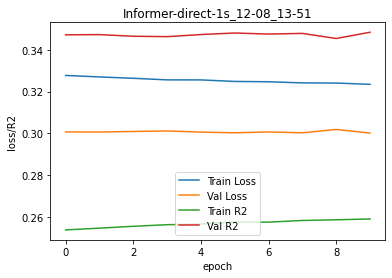

In [9]:
Informer.load('checkpoint/Informer-direct-1s_12-08_13-15.pt')
Informer._set_lr(0.00005)
Informer.train(epochs=10, train_all=True, f='../../stock_price/train/20190723_20190731.hdf',
             val_all=True, testfile=None, save='train',patience=40)

In [10]:
Informer.save('12-08_14-33')

Successfully save


In [ ]:
Informer._set_lr(0.001)
Informer.train(epochs=10, train_all=True, f='../../stock_price/train/20190723_20190731.hdf',
             val_all=True, testfile=None, save='train',patience=40)

Learning Rate is set to 0.001


  0%|          | 0/10 [00:00<?, ?it/s]

Save here
Epoch: 10 |Train_Loss:0.412368 |R2:0.108926|Val_Loss:0.361326 |R2:0.221293 |Rate:0.650 |lr:0.001000
Validation R2 increased (-inf --> 0.221293).  Saving model ...
Epoch: 11 |Train_Loss:0.423008 |R2:0.073189|Val_Loss:0.369935 |R2:0.203245 |Rate:0.633 |lr:0.001000
EarlyStopping counter: 1 out of 40
Epoch: 12 |Train_Loss:0.471930 |R2:-0.050349|Val_Loss:0.457899 |R2:0.012545 |Rate:0.517 |lr:0.001000
EarlyStopping counter: 2 out of 40


success
Learning Rate is set to 1e-05


  0%|          | 0/5 [00:00<?, ?it/s]

Save here
Epoch:  1 |Train_Loss:0.323044 |R2:0.256725|Val_Loss:0.301369 |R2:0.345907 |Rate:0.678 |lr:0.000010
Validation R2 increased (-inf --> 0.345907).  Saving model ...
Save here
Epoch:  2 |Train_Loss:0.322586 |R2:0.257047|Val_Loss:0.301960 |R2:0.344713 |Rate:0.677 |lr:0.000010
EarlyStopping counter: 1 out of 40
Save here
Epoch:  3 |Train_Loss:0.322084 |R2:0.257594|Val_Loss:0.302103 |R2:0.344342 |Rate:0.677 |lr:0.000010
EarlyStopping counter: 2 out of 40
Epoch:  4 |Train_Loss:0.322297 |R2:0.257153|Val_Loss:0.302050 |R2:0.344459 |Rate:0.677 |lr:0.000010
EarlyStopping counter: 3 out of 40
Save here
Epoch:  5 |Train_Loss:0.322181 |R2:0.257610|Val_Loss:0.302013 |R2:0.344493 |Rate:0.677 |lr:0.000010
EarlyStopping counter: 4 out of 40
Done


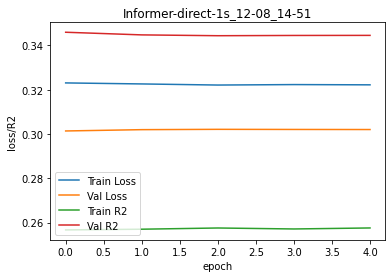

In [10]:
Informer.load('checkpoint/12-08_14-33.pt')
Informer._set_lr(0.00001)
Informer.train(epochs=5, train_all=True, f='../../stock_price/train/20190723_20190731.hdf',
             val_all=True, testfile=None, save='train',patience=40)

In [9]:
Informer.load('checkpoint/12-08_14-33.pt')

success


In [11]:
Informer.boost(1,'t')

  0%|          | 0/2 [00:00<?, ?it/s]

get mse
get index
Drop 42107 (9.274%) data in train\20190710_20190723.hdf
get mse
get index
Drop 18689 (6.095%) data in train\20190723_20190731.hdf


In [12]:
train_f = sorted(glob.glob('temp_train/train/*.hdf'))
train_f

['temp_train/train\\20190710_20190723.hdf',
 'temp_train/train\\20190723_20190731.hdf']

In [13]:
Informer.train_f = train_f

Learning Rate is set to 0.0005


  0%|          | 0/5 [00:00<?, ?it/s]

Save here
Epoch:  1 |Train_Loss:0.296409 |R2:0.252025|Val_Loss:0.313024 |R2:0.320375 |Rate:0.677 |lr:0.000500
Validation R2 increased (-inf --> 0.320375).  Saving model ...
Epoch:  2 |Train_Loss:0.298198 |R2:0.248859|Val_Loss:0.310680 |R2:0.325581 |Rate:0.677 |lr:0.000500
Validation R2 increased (0.320375 --> 0.325581).  Saving model ...
Epoch:  3 |Train_Loss:0.299166 |R2:0.247663|Val_Loss:0.311666 |R2:0.324847 |Rate:0.677 |lr:0.000500
EarlyStopping counter: 1 out of 40
Epoch:  4 |Train_Loss:0.297864 |R2:0.247260|Val_Loss:0.314222 |R2:0.319191 |Rate:0.675 |lr:0.000500
EarlyStopping counter: 2 out of 40
Epoch:  5 |Train_Loss:0.300430 |R2:0.241651|Val_Loss:0.312262 |R2:0.323639 |Rate:0.677 |lr:0.000500
EarlyStopping counter: 3 out of 40
Done


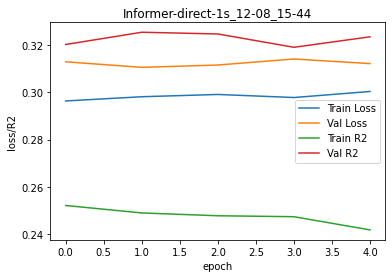

In [14]:
Informer._set_lr(0.0001)
Informer.train(epochs=5, train_all=True, f='../../stock_price/train/20190723_20190731.hdf',
             val_all=True, testfile=None, save='train',patience=40)

success
Learning Rate is set to 5e-05


  0%|          | 0/5 [00:00<?, ?it/s]

Save here
Epoch:  5 |Train_Loss:0.282998 |R2:0.273298|Val_Loss:0.300717 |R2:0.346982 |Rate:0.678 |lr:0.000050
Validation R2 increased (-inf --> 0.346982).  Saving model ...
Save here
Epoch:  6 |Train_Loss:0.282796 |R2:0.274472|Val_Loss:0.300614 |R2:0.347035 |Rate:0.678 |lr:0.000050
Validation R2 increased (0.346982 --> 0.347035).  Saving model ...
Save here
Epoch:  7 |Train_Loss:0.282569 |R2:0.274792|Val_Loss:0.300600 |R2:0.347201 |Rate:0.678 |lr:0.000050
Validation R2 increased (0.347035 --> 0.347201).  Saving model ...
Save here
Epoch:  8 |Train_Loss:0.282306 |R2:0.275590|Val_Loss:0.300670 |R2:0.346977 |Rate:0.678 |lr:0.000050
EarlyStopping counter: 1 out of 40
Save here
Epoch:  9 |Train_Loss:0.281817 |R2:0.275735|Val_Loss:0.300334 |R2:0.347651 |Rate:0.679 |lr:0.000050
Validation R2 increased (0.347201 --> 0.347651).  Saving model ...
Done


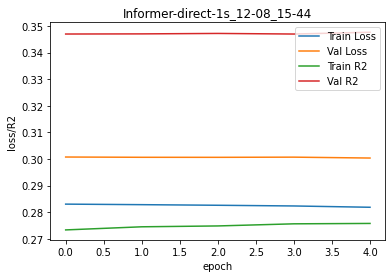

In [15]:
Informer.load('checkpoint/12-08_14-33.pt')
Informer._set_lr(0.00005)
Informer.train(epochs=5, train_all=True, f='../../stock_price/train/20190723_20190731.hdf',
             val_all=True, testfile=None, save='train',patience=40)

  0%|          | 0/10 [00:00<?, ?it/s]

Save here
Epoch:  5 |Train_Loss:0.373613 |R2:0.275739|Val_Loss:0.308126 |R2:0.332667 |Rate:0.674 |lr:0.000500
Validation R2 increased (-inf --> 0.332667).  Saving model ...
Save here
Epoch:  6 |Train_Loss:0.362790 |R2:0.295467|Val_Loss:0.309383 |R2:0.330073 |Rate:0.674 |lr:0.000500
EarlyStopping counter: 1 out of 40
Save here
Epoch:  7 |Train_Loss:0.356082 |R2:0.307472|Val_Loss:0.312887 |R2:0.322528 |Rate:0.672 |lr:0.000500
EarlyStopping counter: 2 out of 40
Save here
Epoch:  8 |Train_Loss:0.333084 |R2:0.341455|Val_Loss:0.350780 |R2:0.241984 |Rate:0.639 |lr:0.000500
EarlyStopping counter: 3 out of 40
Save here
Epoch:  9 |Train_Loss:0.305643 |R2:0.380069|Val_Loss:0.363937 |R2:0.214382 |Rate:0.628 |lr:0.000500
EarlyStopping counter: 4 out of 40
Save here
Epoch: 10 |Train_Loss:0.297638 |R2:0.392264|Val_Loss:0.362231 |R2:0.219378 |Rate:0.632 |lr:0.000500
EarlyStopping counter: 5 out of 40
Save here
Epoch: 11 |Train_Loss:0.292345 |R2:0.400982|Val_Loss:0.365997 |R2:0.212139 |Rate:0.629 |lr:0

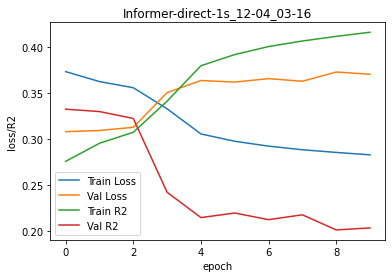

In [13]:
Informer.train(epochs=10, train_all=True, f='../stock_price/train/20190723_20190731.hdf',
             val_all=True, testfile=None, save='train',patience=40)

In [ ]:
Informer._set_lr(0.0001)
Informer.train(epochs=10, train_all=True, f='../stock_price/train/20190723_20190731.hdf',
             val_all=True, testfile=None, save='train',patience=40)

Learning Rate is set to 0.0001


  0%|          | 0/10 [00:00<?, ?it/s]

Save here
Epoch: 14 |Train_Loss:0.275805 |R2:0.427836|Val_Loss:0.385931 |R2:0.174325 |Rate:0.623 |lr:0.000100
Validation R2 increased (-inf --> 0.174325).  Saving model ...
Save here
Epoch: 15 |Train_Loss:0.273505 |R2:0.431264|Val_Loss:0.387848 |R2:0.171527 |Rate:0.623 |lr:0.000100
EarlyStopping counter: 1 out of 40
